<a href="https://colab.research.google.com/github/alorenz465446/NYC_Parking_Tickets/blob/main/NYC_Neuro_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deliverable 1: Preprocessing the Data for a Neural Network

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
from google.colab import files
uploaded = files.upload()
import io


Saving charity_data.csv to charity_data.csv


In [ ]:
#  Import and read the csv.
import pandas as pd 

# Set DataFrame
nyc_df = pd.read_csv(io.BytesIO(uploaded['csv']))
nyc_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
nyc_df= nyc_df.drop(columns = ['column1','column2'])


In [ ]:
# Determine the number of unique values in each column.
nyc_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at 'column' value counts for binning
column_count=nyc_df['column'].value_counts()
column_count

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

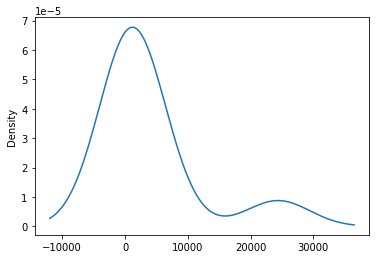

In [ ]:
# Visualize the value counts of 'column'
column_count.plot.density()


In [ ]:
# Determine which values to replace if counts are less than ...?
replace_COLUMN = list(COLUMN_count[COLUMN_count < 500].index)


# Replace in dataframe
for app in replace_COLUMN:
    nyc_df.COLUMN = nyc_df.COLUMN.replace(app,"5M+")
    
# Check to make sure binning was successful
nyc_df.COLUMN.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
5M+                564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [ ]:
#Check Columns
list(nyc_df.columns)

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT',
 'IS_SUCCESSFUL']

In [ ]:
# Generate our categorical variable lists
cat_objects = nyc_df.dtypes[nyc_df.dtypes == "object"].index.tolist()
cat_objects



['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(nyc_df[cat_objects]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat_objects)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_5M+,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Merge one-hot encoded features and drop the originals
nyc_df = nyc_df.merge(encode_df,left_index=True, right_index=True)
nyc_df = nyc_df.drop(cat_objects,1)
nyc_df.head()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_5M+,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Split our preprocessed data into our features and target arrays
y = nyc_df['FEATURE_COLUMN'].values
X = nyc_df.drop(["FEATURE_COLUMN"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="LeakyReLU"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                420       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 559
Trainable params: 559
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Import checkpoint dependencies
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"


In [ ]:
# Compile the model
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epoch
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=1,
#     save_weights_only=True,
#     save_freq=5)


In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])


Streaming output truncated to the last 5000 lines.
Epoch 85: saving model to checkpoints/weights.85.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.5416 - accuracy: 0.7373
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.5415 - accuracy: 0.7377
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.5414 - accuracy: 0.7375
Epoch 85: saving model to checkpoints/weights.85.hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.5414 - accuracy: 0.7380
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.5418 - accuracy: 0.7376
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoi

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5510 - accuracy: 0.7287 - 763ms/epoch - 3ms/step
Loss: 0.5510411262512207, Accuracy: 0.7287463545799255


Export the trained model

In [ ]:
# from google.colab import drive
# drive.mount('drive')

# nn.save("AlphabetSoupCharity_Optimzation.h5")
# !cp AlphabetSoupCharity_Optimzation.h5 "drive/My Drive/"


Mounted at drive
